#  Lab-2
Uni Variant Linear Regression 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Loading the data
data = pd.read_csv('./Admission_Predict.csv')
 
# Now we are storing the column names here
columns = data.columns

# Preprocessing dropiing the column that isn't required

data.drop("Serial No.", axis=1, inplace=True)

# saving data in the y
y = data["Chance of Admit "]
data.drop("Chance of Admit ", axis=1, inplace=True)
print (data.head())

# now using algo
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

linearR = LinearRegression()
# Training step
linearR.fit(x_train, y_train)
# doing predictions
predictions = linearR.predict(x_test)

# finding the error
rootMean= np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error: ", rootMean)





   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0
Root Mean Squared Error:  0.06281122902268371


   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590
Sum of Head values:  861256
Sum of Squared Head values:  3161283190
Number of entries:  237
w1:  0.2634293394893993
w0:  325.57342104944274


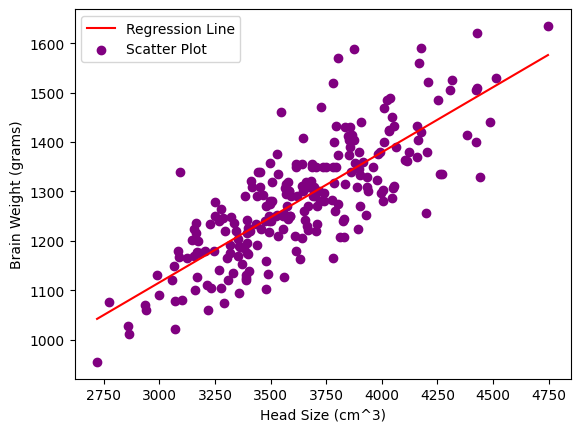

In [11]:
import pandas as pd
import numpy as np

data_frame = pd.read_csv('./headbrain.csv')
print(data_frame.head())

# computing the head and brain in separate variables
head = data_frame["Head Size(cm^3)"].values
brain = data_frame["Brain Weight(grams)"].values

X_sum = np.sum(head)
X_squared_sum = np.sum(head**2)
n = len(head)
print("Sum of Head values: ", X_sum)
print("Sum of Squared Head values: ", X_squared_sum)
print("Number of entries: ", n)

# calculating the cross deviation stuff
numerator = n * np.sum(head * brain) - X_sum * np.sum(brain)
denominator = n * X_squared_sum - (X_sum)**2
w1 = numerator / denominator
# calculating w0, regression coefficient
w0 = (np.sum(brain) - w1 * X_sum) / n

print("w1: ", w1)
print("w0: ", w0)

# plotting the regression line now

import matplotlib.pyplot as plt
max_x = np.max(head)
min_x = np.min(head) 

x1 = np.linspace(min_x, max_x, 1000)
y1 = w0 + w1 * x1

#plotting the line
plt.plot(x1, y1, color='red', label='Regression Line')
#plotting the scatter points
plt.scatter(head, brain, color='purple', label='Scatter Plot')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

# 

In [13]:
# Calculating the Root mean square error

root_mean = 0
for i in range(n):
    y_pred = w0 + w1 * head[i]
    root_mean += (brain[i] - y_pred)**2
root_mean = np.sqrt(root_mean/n)
print("Root Mean Squared Error: ", root_mean)


# calculating R2 score
ss_total = 0
ss_regression = 0
brain_mean = np.mean(brain)
for i in range(n):
    y_pred = w0 + w1 * head[i]
    ss_total += (brain[i] - brain_mean)**2
    ss_regression += (brain[i] - y_pred)**2
r2_score = 1 - (ss_regression/ss_total)
print("R2 Score: ", r2_score)

Root Mean Squared Error:  72.12062137837088
R2 Score:  0.6393117199570004


# Multivariate Linear Regression

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

company_data = pd.read_csv('./1000_Companies.csv')
columns = company_data.columns
print(columns)
print(company_data.head())

# multi variate linear regression
X = company_data.iloc[:, :-1].values
y = company_data.iloc[:, 4].values
X[:5]

# sns.heatmap(company_data.corr())

# encoding categorical data
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
print(X[:5])

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("Predicted values: ", y_pred[:5])
print("Actual values: ", y_test[:5])

# Calculating the R2 Sqr value
print("R2 squarre value: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred))


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]]
Predicted values:  [ 89624.88499984  88261.44060358  94728.57723845 176034.49990954
  83234.84214495]
Actual values:  [ 89012.02672  87654.55773  94093.35179 175396.2616   83356.61784]
R2 squarre value:  0.9112595959622044
Root Mean Squared Error: 192169702.4952243


# Activty 1

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

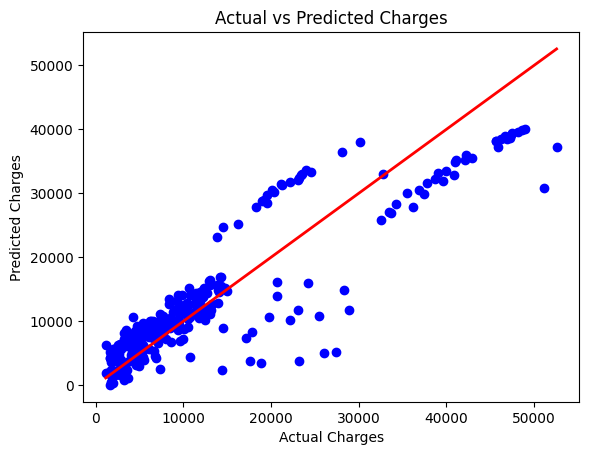

In [24]:
# Load and explore the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#----------------1. loading Dataset------------------
data = pd.read_csv('./Medical Cost Personal Datasets.csv')

# exploring the data
# Data loaded
print(data.head())

# Checking for data types
print(data.info())

# Statistical summary of the dataset
print(data.describe())

# Checking for missing values
print(data.isnull().sum())


#---------------2. Preprocessing the dataset------------------

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encoding categorical data
data["smoker"] = data["smoker"].map({'yes': 1, 'no': 0})
data["sex"] = data["sex"].map({"yes": 1, "no": 0})

# Encoding region 
data = pd.get_dummies(data, columns=['region'], drop_first=True)
data = pd.get_dummies(data, columns=['sex'], drop_first=True)
print(data.head())

# Separating features and target variable
# Features = All columns except Charges
features = data.drop('charges', axis=1)

# Target = Charges
target = data['charges']

# scaling numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_features = ['age', 'bmi', 'children']
features[numeric_features] = scaler.fit_transform(features[numeric_features])
print(features.head())

# ---------------3. Training the model to predict charges------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Making predictions
y_pred = model.predict(X_test)
#--------------------4. Evaluating the model------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
#--------------5. Plot the actual vs predicted charges----------------
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()